In [1]:
# Supress Warnings
# Import Libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
sns.set_style("whitegrid")

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

## 1. Reading the data

In [3]:
# read the data
df_car = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
# displat top 5 rows of Dataset
df_car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 2. Data Cleaning

- Droping unnecessary columns from dataset
- Categorizing different types of columns in selerate list
- Removing the duplicated rows
- Counting the number of differnt categories in categorical column
- Describing and checking the distribution of numerical variables

In [5]:
df_car.drop(['car_ID'], axis=1, inplace=True)

In [6]:
# droping duplicate rows from dataframe
print('shape of data : {}'.format(df_car.shape[0]))
df_car.drop_duplicates(inplace=True)
print('shape of data after performing drop duplicate : {}'.format(df_car.shape[0]))

shape of data : 205
shape of data after performing drop duplicate : 205


In [7]:
# categorizing object and numerical variable differently
cat_variable = []
num_variable = []
for col in df_car.columns:
    if df_car[col].dtype == 'object':
        cat_variable.append(col)
    elif df_car[col].dtype == 'float' or df_car[col].dtype == 'int64':
        num_variable.append(col)

 <b>Categorical Variables</b>
 
 
- CarName, fueltype, aspiration ,doornumber, cylindernumber,
,carbody, drivewheel, enginelocation,enginetype, fuelsystem,


<b>Numerical column</b>

- wheelbase, carlength, carwidth,
carheight, curbweight, enginesize,
boreratio, stroke, compressionratio,
horsepower, peakrpm, citympg,
highwaympg, price

In [8]:
# displaying info of Dataset
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg      

In [9]:
# checking if any column contains NULL value
df_car.isnull().sum()
# no null values

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
# Displaying the count of categories in 
# Categorical column
categorical_col = ['fueltype', 'aspiration', 'doornumber', 
                   'carbody', 'drivewheel', 'enginelocation', 'enginetype',
                   'cylindernumber', 'fuelsystem']
for col in cat_variable:
    print('{} has : {} distinct types of category'.format(col, df_car[col].value_counts().shape[0]))

CarName has : 147 distinct types of category
fueltype has : 2 distinct types of category
aspiration has : 2 distinct types of category
doornumber has : 2 distinct types of category
carbody has : 5 distinct types of category
drivewheel has : 3 distinct types of category
enginelocation has : 2 distinct types of category
enginetype has : 7 distinct types of category
cylindernumber has : 7 distinct types of category
fuelsystem has : 8 distinct types of category


In [11]:
df_car[num_variable].describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## 3. Feature Engineering

- Spliting the company name from carname column
- Binning same company having different spelling in Dataframe
- Droping the column car name
- removing the outliers from numerical column

In [12]:
# there are large number of categories present in column CarName
df_car['CarName'].value_counts()

peugeot 504                        6
toyota corona                      6
toyota corolla                     6
subaru dl                          4
mitsubishi g4                      3
toyota mark ii                     3
honda civic                        3
mitsubishi mirage g4               3
mitsubishi outlander               3
mazda 626                          3
honda accord                       2
bmw x3                             2
porsche cayenne                    2
mazda glc deluxe                   2
toyota starlet                     2
nissan clipper                     2
isuzu D-Max                        2
volvo 244dl                        2
volkswagen dasher                  2
nissan latio                       2
plymouth fury iii                  2
volvo 264gl                        2
mazda rx-4                         2
saab 99gle                         2
nissan rogue                       2
peugeot 604sl                      2
mazda glc                          2
s

In [13]:
# Seperating out car and company name
# Checking if column Company Name has duplicate values or not
df_car['Company_name'] = df_car['CarName'].apply(lambda x:x.split(' ')[0])
df_car['Company_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
maxda           2
vw              2
toyouta         1
mercury         1
vokswagen       1
porcshce        1
Nissan          1
Name: Company_name, dtype: int64

In [14]:
# Droping the column CarName, as it doesnot contribute to analysis
df_car.drop(labels='CarName',axis=1,inplace=True)

In [15]:
# created a dictionary to replace
# simillar company name into one
company_name_map_dict = {
    'maxda' : 'mazda',
    'vw' : 'volkswagen',
    'toyouta' : 'toyota',
    'Nissan' : 'nissan',
    'vokswagen' : 'volkswagen',
    'porcshce' : 'porsche'}
df_car['Company_name'] = df_car['Company_name'].replace(company_name_map_dict)
df_car['Company_name'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
subaru         12
volkswagen     12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: Company_name, dtype: int64

In [16]:
for col in num_variable:
    q_95 = df_car[col].quantile(0.99)
    df_car = df_car[df_car[col]<q_95]

In [17]:
df_car.shape

(145, 25)

## 4. Data Exploration 

- Ploting different categorical variable with dependent variable (Price)
- Exploring how car price varries with in differnt companies
- Checking the relationship between numerical variables and dependent variable

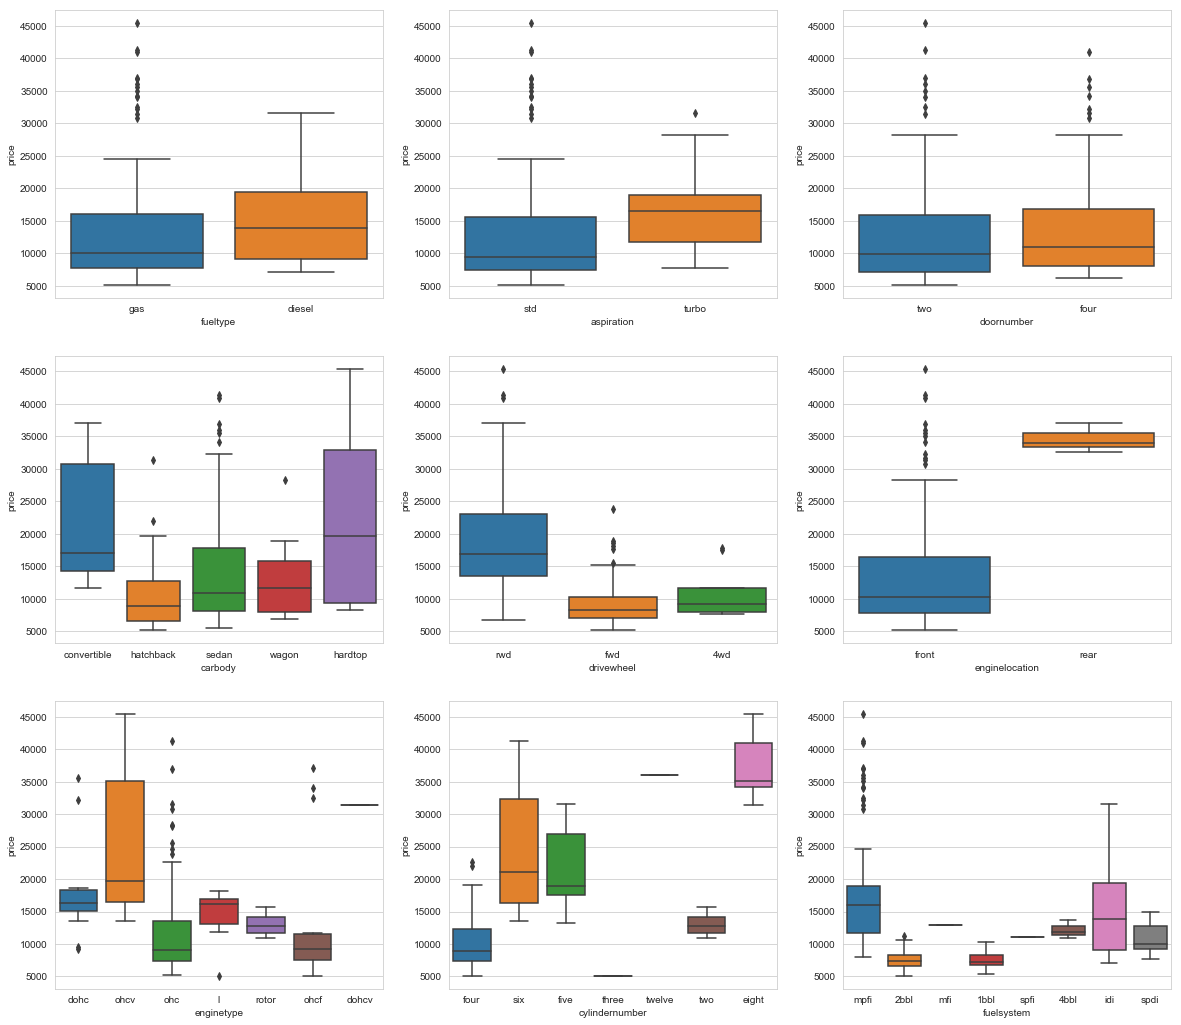

In [16]:
# ['fueltype', 'aspiration', 'doornumber', 
#                    'carbody', 'drivewheel', 'enginelocation', 'enginetype',
#                    'cylindernumber', 'fuelsystem']
# Visualizing the categorical column
# See how one category is impacting the Car Price
plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.boxplot(x = 'fueltype', y = 'price', data = df_car)
plt.subplot(3,3,2)
sns.boxplot(x = 'aspiration', y = 'price', data = df_car)
plt.subplot(3,3,3)
sns.boxplot(x = 'doornumber', y = 'price', data = df_car)
plt.subplot(3,3,4)
sns.boxplot(x = 'carbody', y = 'price', data = df_car)
plt.subplot(3,3,5)
sns.boxplot(x = 'drivewheel', y = 'price', data = df_car)
plt.subplot(3,3,6)
sns.boxplot(x = 'enginelocation', y = 'price', data = df_car)
plt.subplot(3,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = df_car)
plt.subplot(3,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = df_car)
plt.subplot(3,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = df_car)
plt.show()

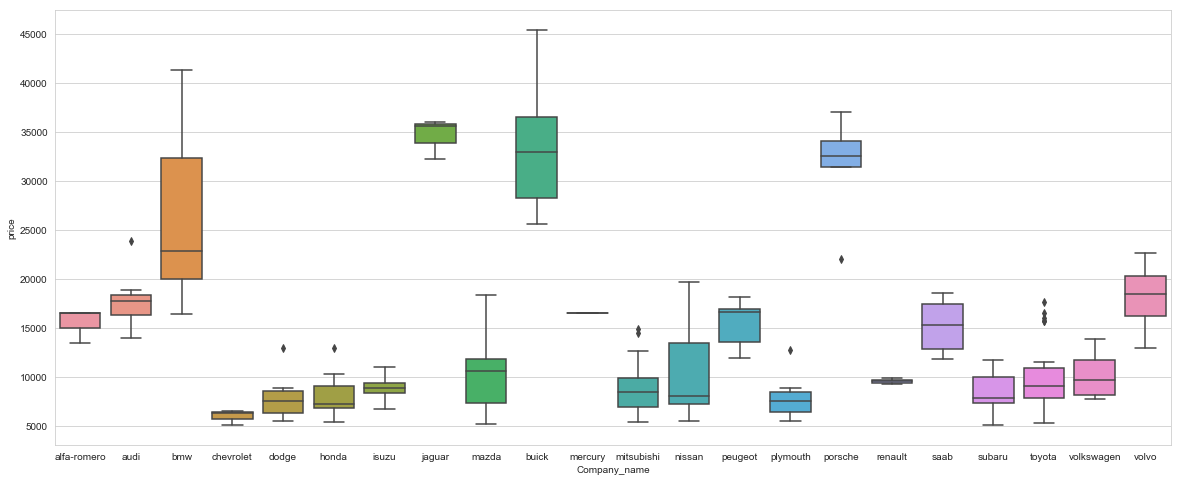

In [17]:
# Visualizing how Car Price is different for different company name
plt.figure(figsize=(20, 8))
sns.boxplot(x = 'Company_name', y = 'price', data = df_car)

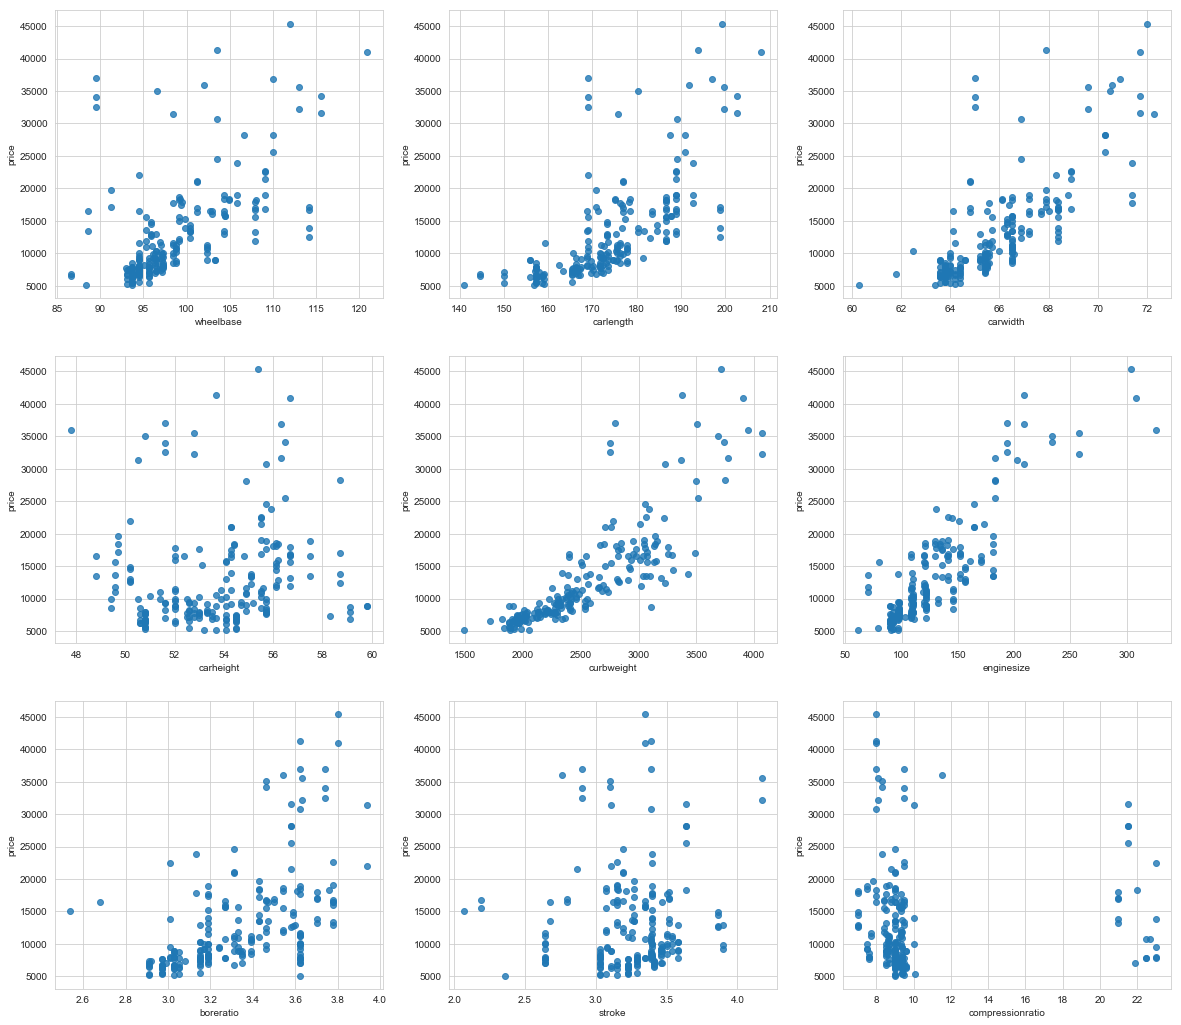

In [18]:
# visualizing numerical column, 
# to see which column is linearly related and which not
numerical_column = ['wheelbase', 'carlength', 'carwidth',
                    'carheight', 'curbweight', 'enginesize',
                    'boreratio', 'stroke', 'compressionratio',
                   'horsepower' , 'peakrpm', 'citympg','highwaympg','price']

plt.figure(figsize=(20, 18))
plt.subplot(3,3,1)
sns.regplot('wheelbase', 'price', df_car, fit_reg=False)
plt.subplot(3,3,2)
sns.regplot('carlength', 'price', df_car, fit_reg=False)
plt.subplot(3,3,3)
sns.regplot('carwidth', 'price', df_car, fit_reg=False)
plt.subplot(3,3,4)
sns.regplot('carheight', 'price', df_car, fit_reg=False)
plt.subplot(3,3,5)
sns.regplot('curbweight', 'price', df_car, fit_reg=False)
plt.subplot(3,3,6)
sns.regplot('enginesize', 'price', df_car, fit_reg=False)
plt.subplot(3,3,7)
sns.regplot('boreratio', 'price', df_car, fit_reg=False)
plt.subplot(3,3,8)
sns.regplot('stroke', 'price', df_car, fit_reg=False)
plt.subplot(3,3,9)
sns.regplot('compressionratio', 'price', df_car, fit_reg=False)

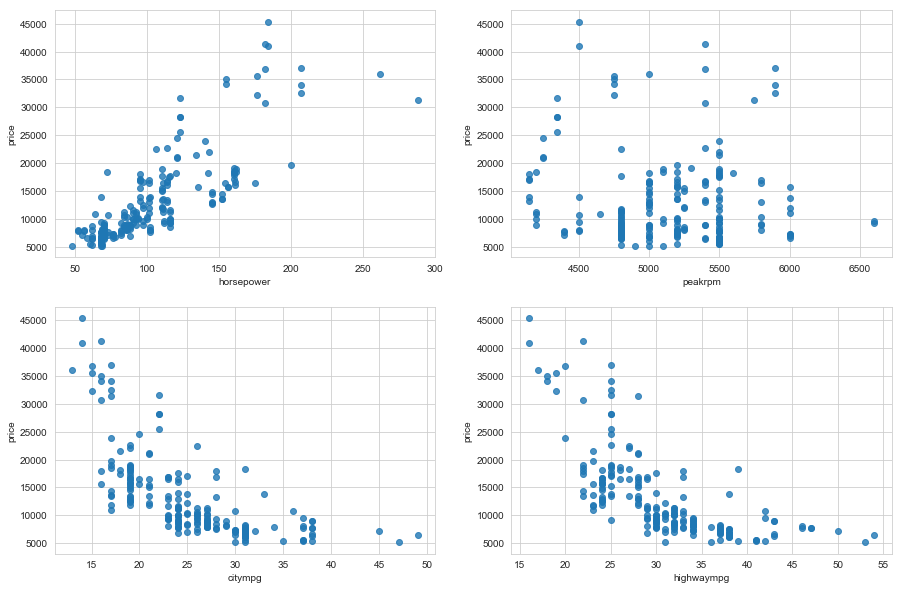

In [19]:
# visualizing numerical column, 
# to see which column is linearly related and which not

plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.regplot('horsepower', 'price', df_car, fit_reg=False)
plt.subplot(2,2,2)
sns.regplot('peakrpm', 'price', df_car, fit_reg=False)
plt.subplot(2,2,3)
sns.regplot('citympg', 'price', df_car, fit_reg=False)
plt.subplot(2,2,4)
sns.regplot('highwaympg', 'price', df_car, fit_reg=False)

In [20]:
# car of Porsche, Buick and Jaguar have maximum price followed by BMW than volvo, saab, peugeot, audi and alfa-romero

In [21]:
company_mean_price = df_car.pivot_table(values='price', index='Company_name', aggfunc='mean')
company_mean_price.T

Company_name,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,mitsubishi,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
price,15498.333333,17859.166714,26118.75,33647.0,6007.0,7875.444444,8184.692308,8916.5,34600.0,10652.882353,16503.0,9239.769231,10415.666667,15489.090909,7963.428571,31400.5,9595.0,15223.333333,8541.25,9885.8125,10077.5,18063.181818


In [22]:
# checking the mean distributin of price of different companies we can categorise them into premium, luxury and budget companies
# premium - price >= 25000
# luxury - 10000<= price < 25000
# budget - price <= 10000

In [23]:
df_car['Company_category'] = df_car['Company_name'].apply(lambda x:company_mean_price.loc[x].values[0])

def company_category(value):
    if value >=25000:
        return 'Premium'
    elif value>=10000:
        return 'Luxury'
    else:
        return 'Budget'
    
df_car['Company_category'] = df_car['Company_category'].apply(company_category)

In [24]:
df_car['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

## 5. Data Transformation

- Converting the categorical data into numerical form
- Scaling the diffenrent reanges of values in one common distribution
- preparing data for training and test seperatelly

In [25]:
# converting categorical column into dummy variables 
# to make them process in ML model
df_car['fueltype'] = df_car['fueltype'].map({'gas':0, 'diesel':1})
df_car['aspiration'] = df_car['aspiration'].map({'std':0, 'turbo':1})
df_car['doornumber'] = df_car['doornumber'].map({'four':0, 'two':1})
df_car['enginelocation'] = df_car['enginelocation'].map({'front':0, 'rear':1})

In [26]:
# creating the dummy variables for column
# having more than 2 categories
for col in ['carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'fuelsystem', 'Company_category']:
    df_car = pd.get_dummies(df_car, columns=[col], drop_first=True)

In [27]:
# displaying new dataframe converting all 
# categorical column in the form of 0-1 
# except Company Name
df_car.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company_name,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Company_category_Luxury,Company_category_Premium
0,3,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
1,3,0,0,1,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
2,1,0,0,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
3,2,0,0,0,0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,audi,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,2,0,0,0,0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,audi,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [28]:
# creating dummy variables of column Company Name
df_car = pd.get_dummies(df_car, columns=['Company_name'], drop_first=True)

## 6. Feature Extraction

- Idenifying correlation between numerical variables
- Removing highly corelated variables
- Training a ML model
- Using RFE to eliminate redundent feature that are created while creating dummies

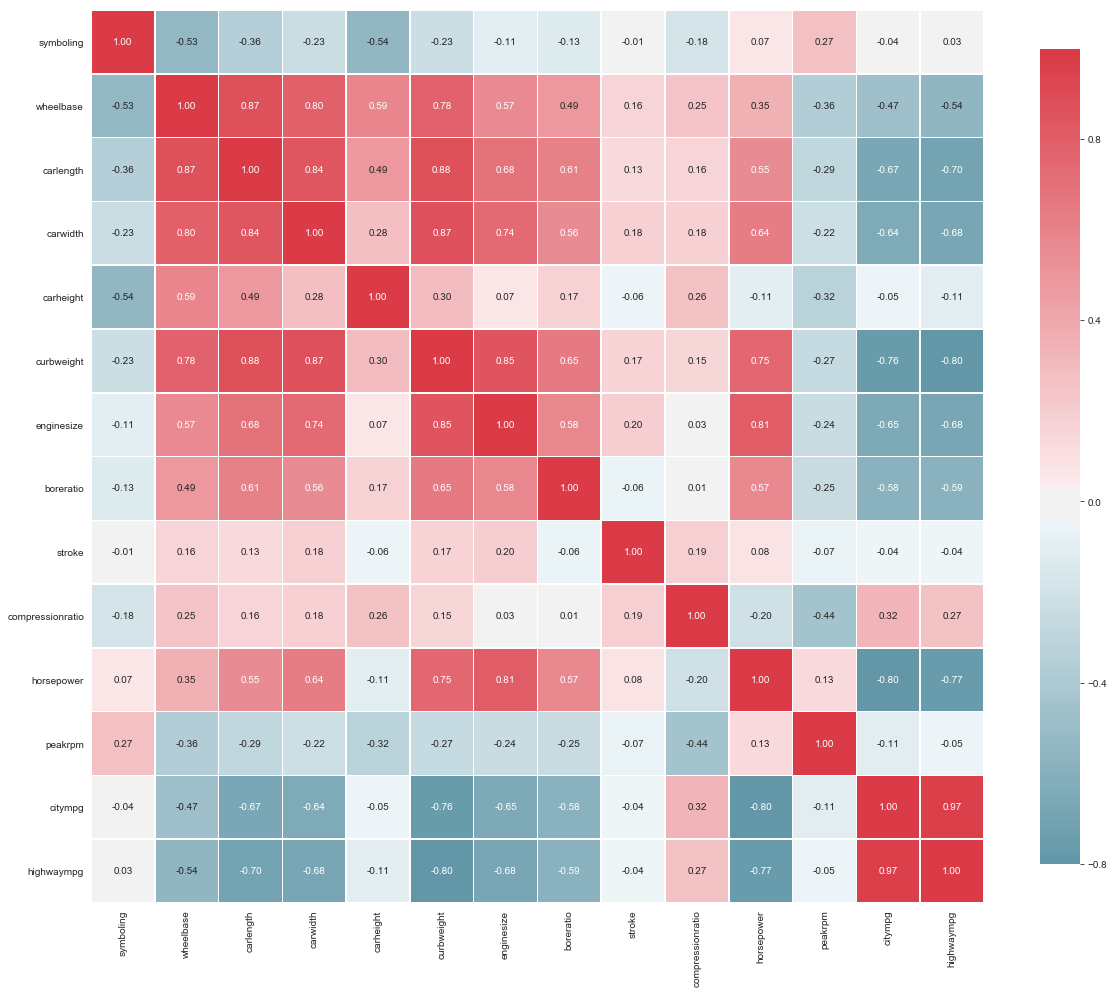

In [29]:
def corr_heatmap(df, v):
    correlations = df[v].corr()
    # Create color map ranging between two colors
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    fig, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(correlations, cmap=cmap, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .75})
    plt.show()
    
corr_heatmap(df_car, num_variable[:-1])


- **citympg** and **highwaympg**  = 0.97
- **curveweight** and **highwaympg** = 0.80
- **curveweight** and **carlength** = 0.88
- **curveweight** and **carwidth** = 0.87
- **wheelbase** and **carlength** = 0.87
- **horsepower** and **enginesize** = 0.81

In [30]:
# droping highlly correlated variables from dataframe
df_car = df_car.drop(['citympg', 'curbweight', 'wheelbase', 'enginesize', 'carwidth'], axis=1)

In [31]:
# spliting the dataframe into test and train
df_train, df_test = train_test_split(df_car, test_size = 0.15, random_state=44)

# converting all the numerical columns inthe range of [0,1]
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_train[list(df_train.columns)] = scaler.fit_transform(df_train)

# taking price column in 'y' as dependent variables
# and rest of the data in 'x' as independent variables
y_train = df_train.pop('price')
X_train = df_train

In [32]:
print('size of training dataset : ', df_train.shape)
print('size of test dataset : ', df_test.shape)

size of training dataset :  (174, 61)
size of test dataset :  (31, 62)


In [33]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [34]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train) # Model_1

rfe = RFE(lm, 20)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
# Displaying the list of column with there rfe rank
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('symboling', False, 5),
 ('fueltype', False, 3),
 ('aspiration', False, 17),
 ('doornumber', False, 40),
 ('enginelocation', False, 2),
 ('carlength', True, 1),
 ('carheight', False, 26),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 32),
 ('horsepower', True, 1),
 ('peakrpm', False, 15),
 ('highwaympg', False, 8),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 20),
 ('drivewheel_rwd', False, 27),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 10),
 ('enginetype_ohc', True, 1),
 ('enginetype_ohcf', False, 24),
 ('enginetype_ohcv', False, 28),
 ('enginetype_rotor', False, 36),
 ('cylindernumber_five', True, 1),
 ('cylindernumber_four', True, 1),
 ('cylindernumber_six', False, 35),
 ('cylindernumber_three', False, 38),
 ('cylindernumber_twelve', True, 1),
 ('cylindernumber_two', False, 37),
 ('fuelsystem_2bbl', False, 16),
 ('fuelsystem_4bbl', Fa

In [36]:
# taking a subset of column, that rfe has suggested important
col = X_train.columns[rfe.support_]
col

Index(['carlength', 'boreratio', 'stroke', 'horsepower', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohcv', 'enginetype_ohc', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_twelve', 'fuelsystem_idi',
       'Company_category_Premium', 'Company_name_audi', 'Company_name_buick',
       'Company_name_jaguar', 'Company_name_mercury', 'Company_name_peugeot'],
      dtype='object')

In [37]:
# Creating X_test dataframe with RFE selected variables
X_rfe = X_train[col]

In [38]:
# Adding a constant variable 
import statsmodels.api as sm  
X_rfe = sm.add_constant(X_rfe)

In [39]:
lm = sm.OLS(y_train,X_rfe).fit()   # Running the linear model 
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     116.9
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           4.97e-82
Time:                        12:22:03   Log-Likelihood:                 274.95
No. Observations:                 174   AIC:                            -507.9
Df Residuals:                     153   BIC:                            -441.6
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [40]:
X_rfe = X_rfe.drop(['boreratio', 'Company_name_mercury'], axis=1)

In [41]:
X_rfe = X_rfe.drop(['const'], axis=1)

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,carlength,30.28
1,stroke,28.17
2,horsepower,17.26
8,enginetype_ohc,14.25
5,carbody_sedan,14.16
10,cylindernumber_four,11.86
4,carbody_hatchback,8.22
9,cylindernumber_five,5.42
6,carbody_wagon,4.41
13,Company_category_Premium,4.08


In [42]:
X_rfe = X_rfe.drop(['stroke'], axis=1)
X_rfe = sm.add_constant(X_rfe)

lm = sm.OLS(y_train,X_rfe).fit()   # Running the linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     126.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           7.39e-82
Time:                        12:22:04   Log-Likelihood:                 266.23
No. Observations:                 174   AIC:                            -496.5
Df Residuals:                     156   BIC:                            -439.6
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [43]:
X_rfe = X_rfe.drop(['Company_name_jaguar', 'cylindernumber_twelve'], axis=1)

lm = sm.OLS(y_train,X_rfe).fit()   # Running the linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     143.5
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           8.89e-84
Time:                        12:22:04   Log-Likelihood:                 265.61
No. Observations:                 174   AIC:                            -499.2
Df Residuals:                     158   BIC:                            -448.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [44]:
X_rfe = X_rfe.drop(['enginetype_ohc'], axis=1)

lm = sm.OLS(y_train,X_rfe).fit()   # Running the linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     151.5
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           3.31e-84
Time:                        12:22:04   Log-Likelihood:                 263.90
No. Observations:                 174   AIC:                            -497.8
Df Residuals:                     159   BIC:                            -450.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [45]:
X_rfe = X_rfe.drop(['Company_name_peugeot'], axis=1)

lm = sm.OLS(y_train,X_rfe).fit()   # Running the linear model 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     162.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           6.78e-85
Time:                        12:22:04   Log-Likelihood:                 262.83
No. Observations:                 174   AIC:                            -497.7
Df Residuals:                     160   BIC:                            -453.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [46]:
# deciding parameters are
X_rfe.columns.tolist()

['const',
 'carlength',
 'horsepower',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'enginetype_dohcv',
 'cylindernumber_five',
 'cylindernumber_four',
 'fuelsystem_idi',
 'Company_category_Premium',
 'Company_name_audi',
 'Company_name_buick']

In [47]:
def comparison_line_plot(y, y_pred):
    c = [i for i in range(0,len(y),1)]
    fig = plt.figure(figsize=(15,7))
    plt.plot(c,y, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Price', fontsize=16)                               # Y-label
    plt.legend(['Actual Price', 'Predicted Price'])

In [48]:
# Plot the histogram of the error terms
def plot_histogram(y, y_pred):
    fig = plt.figure()
    sns.distplot((y - y_pred), bins = 20)
    fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
    plt.xlabel('Errors', fontsize = 18)     

In [49]:
y_train_pred = lm.predict(X_rfe)

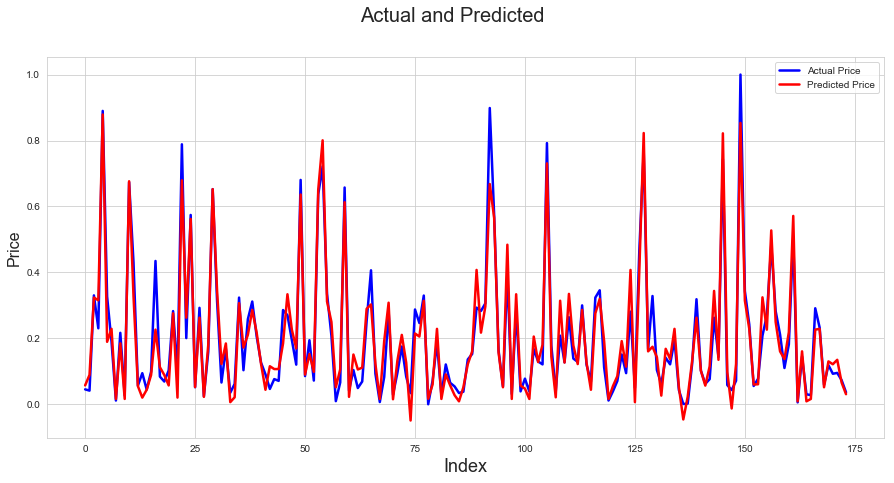

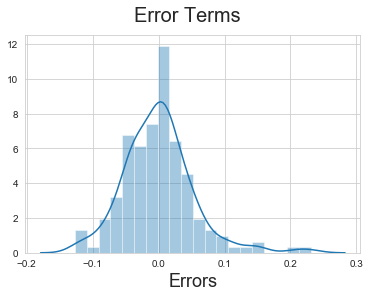

In [50]:
comparison_line_plot(y_train, y_train_pred)
plot_histogram(y_train, y_train_pred)

In [51]:
df_test[list(df_test.columns)] = scaler.transform(df_test)
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,carlength,carheight,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Company_category_Luxury,Company_category_Premium,Company_name_audi,Company_name_bmw,Company_name_buick,Company_name_chevrolet,Company_name_dodge,Company_name_honda,Company_name_isuzu,Company_name_jaguar,Company_name_mazda,Company_name_mercury,Company_name_mitsubishi,Company_name_nissan,Company_name_peugeot,Company_name_plymouth,Company_name_porsche,Company_name_renault,Company_name_saab,Company_name_subaru,Company_name_toyota,Company_name_volkswagen,Company_name_volvo
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.0,31.000000,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.000000,31.000000,31.0,31.000000,31.000000,31.000000,31.0,31.000000,31.0,31.0,31.000000,31.000000,31.000000,31.0
mean,0.580645,0.096774,0.225806,0.451613,0.032258,0.480597,0.491667,0.565668,0.559370,0.188911,0.242204,0.404213,0.355688,0.205892,0.032258,0.451613,0.354839,0.129032,0.612903,0.354839,0.0,0.096774,0.645161,0.129032,0.032258,0.032258,0.096774,0.741935,0.129032,0.0,0.0,0.032258,0.225806,0.0,0.096774,0.0,0.516129,0.064516,0.032258,0.451613,0.129032,0.096774,0.032258,0.0,0.0,0.064516,0.064516,0.032258,0.032258,0.064516,0.0,0.064516,0.064516,0.096774,0.0,0.064516,0.0,0.0,0.096774,0.096774,0.129032,0.0
std,0.254846,0.300537,0.425024,0.505879,0.179605,0.182179,0.217509,0.187014,0.171764,0.247244,0.154391,0.249415,0.145393,0.181438,0.179605,0.505879,0.486373,0.340777,0.495138,0.486373,0.0,0.300537,0.486373,0.340777,0.179605,0.179605,0.300537,0.444803,0.340777,0.0,0.0,0.179605,0.425024,0.0,0.300537,0.0,0.508001,0.249731,0.179605,0.505879,0.340777,0.300537,0.179605,0.0,0.0,0.249731,0.249731,0.179605,0.179605,0.249731,0.0,0.249731,0.249731,0.300537,0.0,0.249731,0.0,0.0,0.300537,0.300537,0.340777,0.0
min,0.200000,0.000000,0.000000,0.000000,0.000000,0.132836,0.150000,0.264286,0.057143,0.000000,0.050000,0.000000,0.078947,0.006976,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
25%,0.400000,0.000000,0.000000,0.000000,0.000000,0.394030,0.333333,0.457143,0.488095,0.093750,0.145833,0.255102,0.236842,0.075456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0
50%,0.600000,0.000000,0.000000,0.000000,0.000000,0.461194,0.458333,0.550000,0.628571,0.125000,0.195833,0.428571,0.368421,0.152103,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000

R2 score of test data : 0.8545799349361269


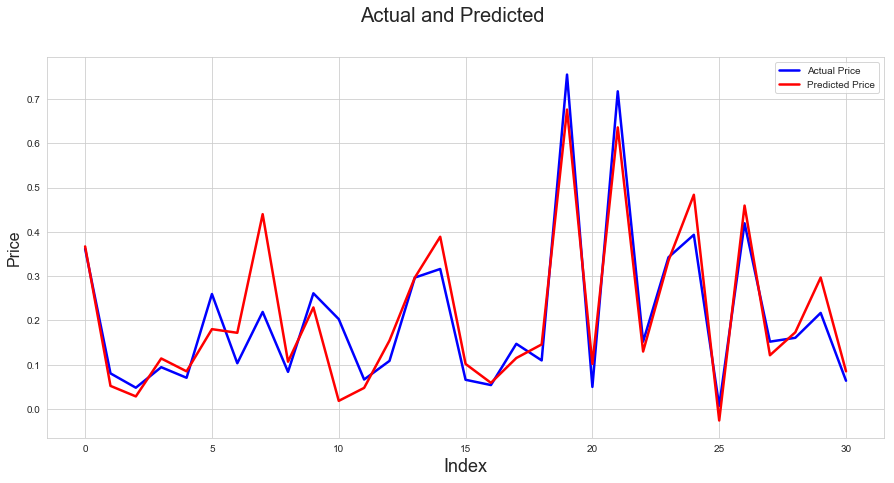

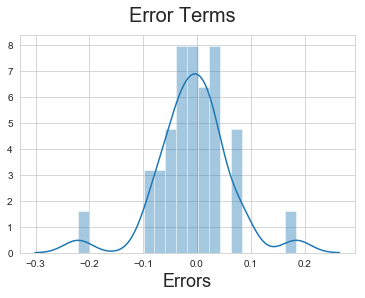

In [52]:
# compare the results on final model
model_col = ['carlength',
 'horsepower',
 'carbody_hardtop',
 'carbody_hatchback',
 'carbody_sedan',
 'carbody_wagon',
 'enginetype_dohcv',
 'cylindernumber_five',
 'cylindernumber_four',
 'fuelsystem_idi',
 'Company_category_Premium',
 'Company_name_audi',
 'Company_name_buick']

X_test_ref = sm.add_constant(df_test[model_col].values) # Adding a constant variable 
y_test_pred = lm.predict(X_test_ref)

comparison_line_plot(df_test['price'], y_test_pred)
plot_histogram(df_test['price'], y_test_pred)

print('R2 score of test data :', r2_score(y_true=df_test['price'], y_pred=y_test_pred))

### R score on test data is 0.85
### error terms have normal distribution thus comprises ML model is not fitted by chanse